In [ ]:
#Fordham University
#Felipe Trinidad
#CISC 5660 L01 Lab 1
#3/1/24

In [1]:
# Import Statements

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read Malware-staDyn-data.csv
#CSV was downloaded from https://storm.cis.fordham.edu/~gweiss/classes/cisc5660/data/Malware-staDyn-data.csv
#CSV must be uploaded to Jupiter and in the same folder as this file

dataframe = pd.read_csv("Malware-staDyn-data.csv", header='infer')

#Display
dataframe.head()
ones = []
zeros = []
for x in dataframe["label"]:
    if x == 1:
        ones.append(x)
    else:
        zeros.append(x)
        
df = dataframe

label
1    5653
0     595
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2e87dc3db50>,
 [Text(-1.051137863151662, 0.324205479054501, "['Benign', 5653]"),
  Text(1.0511378783288143, -0.3242054298471861, "['Malware', 595]")])

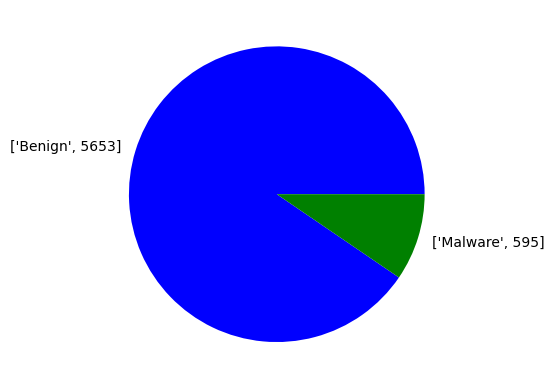

In [3]:
#Pie Chart

info = dataframe["label"].value_counts()
print(info)
plt.pie(dataframe["label"].value_counts(), labels = [["Benign", info[1]], ["Malware", info[0]]], colors = ["blue","green"])

In [4]:
#Split the Data
X_train, X_Test, y_train, y_test = train_test_split(dataframe.drop('label', axis=1), dataframe["label"], test_size=0.33, random_state=42)

In [5]:
print(X_train)

      Virtual  Offset  loc  Import  Imports  var  Forwarder  UINT  LONG  BOOL  \
489         0       0    1       0        0    0          0     0     0     0   
4376        0       0    0       0        0    0          0     0     0     0   
690         0       0   45       0        0    0          0     0     0     0   
2653        0       0    0       0        0    0          0     0     0     0   
602         0       0    4       0        0    0          0     0     0     0   
...       ...     ...  ...     ...      ...  ...        ...   ...   ...   ...   
3772        0       0    5       0        0    0          0     0     0     0   
5191        0       0    0       0        0    0          0     0     0     0   
5226        0       0  206       0        0    0          0     0     0     0   
5390        0       0   84       0        0    0          0     0     0     0   
860         0       0  204       0        0    0          0     0     0     0   

      ...  count_file_read 

In [6]:
X = dataframe.drop('label', axis=1)
y = dataframe["label"]

X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('label', axis=1), dataframe["label"], test_size=0.33, random_state=99)

In [7]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_norm = clf.fit(X_train,y_train)

#Predict response
y_pred = clf_norm.predict(X_test)

In [8]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9888457807953444
AUC: 0.9746912416693994
F1-Score: 0.9937854633882734
Precision: 0.9951298701298701
Recall: 0.9924446842957366


In [9]:
# RandomOverSampler for rebalancing training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [10]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_norm_ros = clf.fit(X_train_resampled,y_train_resampled)

#Predict the response for test dataset
y_pred_ros = clf_norm_ros.predict(X_test)

In [11]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9888457807953444
AUC: 0.9746912416693994
F1-Score: 0.9937854633882734
Precision: 0.9951298701298701
Recall: 0.9924446842957366


In [12]:
# Use SMOTE to rebalance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_norm_smote = clf.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = clf_norm_smote.predict(X_test)

In [14]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9888457807953444
AUC: 0.9746912416693994
F1-Score: 0.9937854633882734
Precision: 0.9951298701298701
Recall: 0.9924446842957366


In [15]:
RF = RandomForestClassifier(n_estimators=10)

# Train Decision Tree Classifer
RF_norm = RF.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = RF_norm.predict(X_test)

In [16]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [17]:
RF = RandomForestClassifier(n_estimators=5)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [18]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [19]:
RF = RandomForestClassifier(n_estimators=10)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [20]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [21]:
RF = RandomForestClassifier(n_estimators=20)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [22]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [23]:
RF = RandomForestClassifier(n_estimators=10, max_features=5)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [24]:
RF = RandomForestClassifier(n_estimators=10, max_features=5)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [25]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [26]:
RF = RandomForestClassifier(n_estimators=10, max_features=10)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [27]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [28]:
RF = RandomForestClassifier(n_estimators=10, max_features=20)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [29]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [30]:
RF = RandomForestClassifier(n_estimators=10, max_features=40)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [31]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [32]:
RF = RandomForestClassifier(n_estimators=10, max_features=100)

# Train Decision Tree Classifer
RF_norm_smote = RF.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_smote = RF_norm_smote.predict(X_test)

In [33]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.988360814742968
AUC: 0.953196291026836
F1-Score: 0.9935483870967742
Precision: 0.9898232458489555
Recall: 0.9973016729627631


In [34]:
kNN = KNeighborsClassifier()

# Train Decision Tree Classifer
kNN_norm = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = kNN_norm.predict(X_test)

In [35]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [36]:
kNN = KNeighborsClassifier(n_neighbors=5)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [37]:
kNN = KNeighborsClassifier(n_neighbors=5)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [38]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [39]:
kNN = KNeighborsClassifier(n_neighbors=1)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [40]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [41]:
kNN = KNeighborsClassifier(n_neighbors=3)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [42]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [43]:
kNN = KNeighborsClassifier(n_neighbors=5)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [44]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [45]:
kNN = KNeighborsClassifier(n_neighbors=10)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [46]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [47]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [48]:
kNN = KNeighborsClassifier(n_neighbors=10)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [49]:
#Print Table
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


In [50]:
kNN = KNeighborsClassifier(n_neighbors=20)

# Train Decision Tree Classifer
kNN_norm_smote = kNN.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_smote = kNN_norm_smote.predict(X_test)

In [51]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
F11 = metrics.f1_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy1)
print("AUC:",auc1)
print("F1-Score:",F11)
print("Precision:",precision1)
print("Recall:",recall1)

Accuracy: 0.9806013579049466
AUC: 0.9170412908589978
F1-Score: 0.9892876272094269
Precision: 0.9819245082402978
Recall: 0.9967620075553157


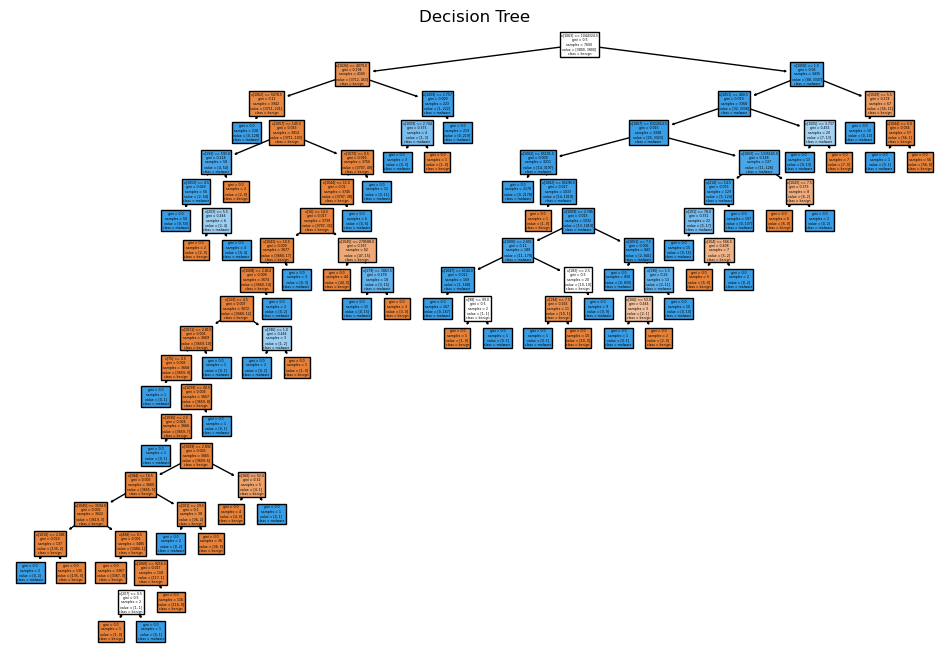

In [52]:
# Plot a decision tree diagram

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, class_names=["benign", "malware"], filled=True)
plt.title('Decision Tree')
plt.show()

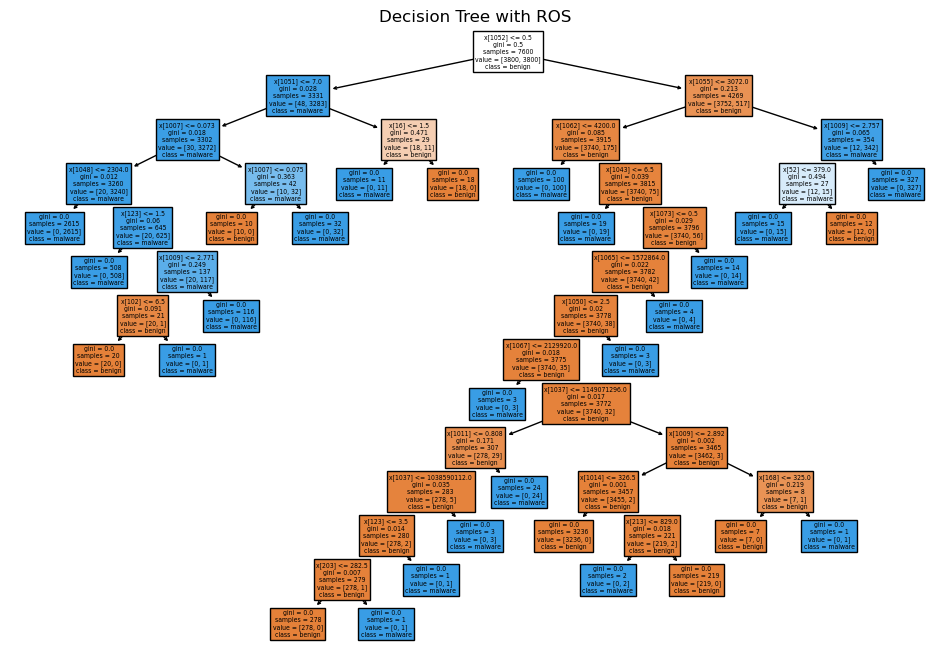

In [53]:
# Plot a decision tree diagram with ROS

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_norm_ros, class_names=["benign", "malware"], filled=True)
plt.title('Decision Tree with ROS')
plt.show()

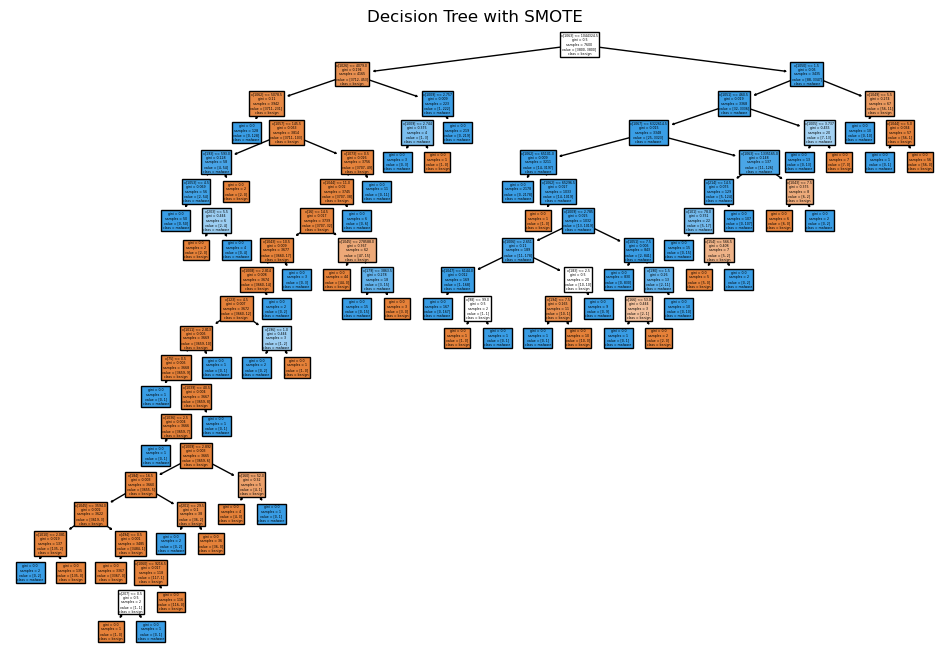

In [54]:
# Plot a decision tree diagram with SMOTE

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_norm_smote, class_names=["benign", "malware"], filled=True)
plt.title('Decision Tree with SMOTE')
plt.show()

In [55]:
from tabulate import tabulate
from sklearn import metrics

#Table header
headers = ['Algorithm', 'Balance Strategy','Parameters','Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall']

#Assuming x1, x2, x3, x4, x5 are defined elsewhere in your code
x1, x2, x3, x4, x5 = 0, 0, 0, 0, 0

#Table Data
data = [
            ['DT', 'unbalanced','-----', metrics.accuracy_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred), metrics.f1_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)],
            ['DT', 'ROS','-----',metrics.accuracy_score(y_test, y_pred_ros), metrics.roc_auc_score(y_test, y_pred_ros), metrics.f1_score(y_test, y_pred_ros), metrics.precision_score(y_test, y_pred_ros), metrics.recall_score(y_test, y_pred_ros)],
            ['DT', 'SMOTE','-----',metrics.accuracy_score(y_test, y_pred_smote), metrics.roc_auc_score(y_test, y_pred_smote), metrics.f1_score(y_test, y_pred_smote), metrics.precision_score(y_test, y_pred_smote), metrics.recall_score(y_test, y_pred_smote)],
            ['RF', 'unbalanced','10 Trees', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','5 Trees', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','20 Trees', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','10 Trees, 5 features', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','10 Trees, 10 features', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','10 Trees, 20 features', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','10 Trees, 40 features', x1, x2, x3, x4, x5],
            ['RF', 'SMOTE','10 Trees, 100 features', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','-----', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=5', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=1', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=3', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=5', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=10', x1, x2, x3, x4, x5],
            ['kNN', 'unbalanced','k=20', x1, x2, x3, x4, x5],
        ]

# Create the table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+-------------+--------------------+------------------------+------------+----------+------------+-------------+----------+
| Algorithm   | Balance Strategy   | Parameters             |   Accuracy |      AUC |   F1-Score |   Precision |   Recall |
+=============+====================+========================+============+==========+============+=============+==========+
| DT          | unbalanced         | -----                  |   0.980601 | 0.917041 |   0.989288 |    0.981925 | 0.996762 |
+-------------+--------------------+------------------------+------------+----------+------------+-------------+----------+
| DT          | ROS                | -----                  |   0.992241 | 0.978703 |   0.995683 |    0.995683 | 0.995683 |
+-------------+--------------------+------------------------+------------+----------+------------+-------------+----------+
| DT          | SMOTE              | -----                  |   0.978661 | 0.909594 |   0.988223 |    0.980351 | 0.996222 |
+-------